# Standard Scalar, fit, transform, fit-transform
### Jeśli mamy dane, zawsze chcemy je skalować np. przy pomocy StandardScaler(), wynika to z paru czynników:
- ważność cech, jeśli mamy 2 cechy - wiek - [23, 42, 11, 33] i wzrost [188, 174, 182, 172] cechy powiązane z wiekiem będą miały miejsze wartości pomimo tego że mogą być ważniejsze w tworzeniu predykcji. Z tego powodu jeśli ustandaryzujemy dane, otrzymamy je w przedziale w którym obie cechy będą miały podobne wartości, przykładowo [2.1, 3.1, 1.1, 3.1] i [1.82, 1.76. 1.92]
- konsekwencją tego że nasze dane będą rozrzucone na przedziale wartości 1-20 dla cechy_1 oraz 170-210 dla cechy_2 będzie nieprawidłowe działanie gradient descent, ponieważ funkcja będzie malała w jednym kierunku szybciej niż w innym
https://www.youtube.com/watch?v=rIKVoHp1HLM - Standard Scalar, fit, transform, fit-transform

### Jak to się dzieje?
Wyliczamy średnie odchylenie standardowe oraz wartość średnią a następnie wstawiamy dla każdego równania i wykorzystujemy dla każdej wartości



\begin{equation}
\
Z_i = \frac{X_i - \bar{X}}{\sigma_X}
\
\end{equation}

- fit - oblicza odchylenie standardowe oraz wartość oczekiwaną (średnią)
- transform - wykorzystuje obliczone parametry do wyznaczenia ustandaryzowanych danych
- fit_transform - robi obie rzeczy jednocześnie

### Ważne, do x_train wykorzystujemy fit_transform a do y_train tylko transform


## Fit

In [ ]:
scalar = StandardScaler()
X=np.array([ [23, 42, 11, 33],
            [188, 174, 182, 172],
             [1, 2, 3, 4]])
X_fit = scalar.fit(X) # fit wyznacza wartości potrzebne do przeprowadzenia standaryzacji
print("Mean:", X_fit.mean_)
print("Scale:", X_fit.scale_)
print("Var:", X_fit.var_)

Mean: [70.66666667 72.66666667 65.33333333 69.66666667]
Scale: [83.45191563 73.49074016 82.56041559 73.32272651]
Var: [6964.22222222 5400.88888889 6816.22222222 5376.22222222]


## Transform

In [ ]:
X_transform=scalar.transform(X) # staworzenie ustandaryzowanych danych

print('Nieustandaryzowane dane:\n',X)
print('Ustandaryzowane dane:\n',X_transform)

Nieustandaryzowane dane:
 [[ 23  42  11  33]
 [188 174 182 172]
 [  1   2   3   4]]
Ustandaryzowane dane:
 [[-0.57118721 -0.41728613 -0.65810392 -0.50007233]
 [ 1.40599928  1.37885852  1.41310658  1.39565641]
 [-0.83481207 -0.96157239 -0.75500266 -0.89558408]]


## Fit_transform

In [ ]:
X_fit_transform = scalar.fit_transform(X) # wykonuje fit oraz transform jednocześnie
X_fit_transform

array([[-0.57118721, -0.41728613, -0.65810392, -0.50007233],
       [ 1.40599928,  1.37885852,  1.41310658,  1.39565641],
       [-0.83481207, -0.96157239, -0.75500266, -0.89558408]])

### Ćwiczenie modelu bez i z standaryzacją danych

14/14 [==============================] - 0s 3ms/step - loss: 0.4454 - accuracy: 0.9178
Train score: [0.44544312357902527, 0.9178403615951538]
5/5 [==============================] - 0s 5ms/step - loss: 0.4162 - accuracy: 0.9371
Train score: [0.41620340943336487, 0.9370629191398621]


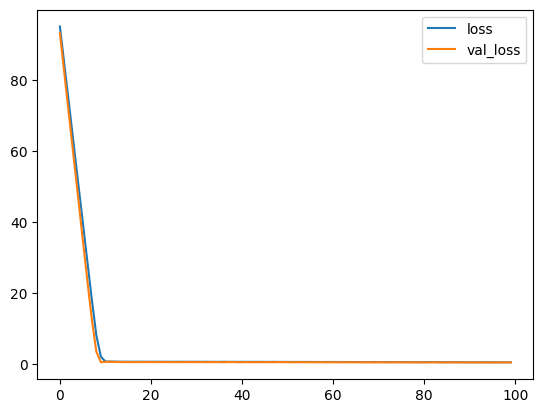

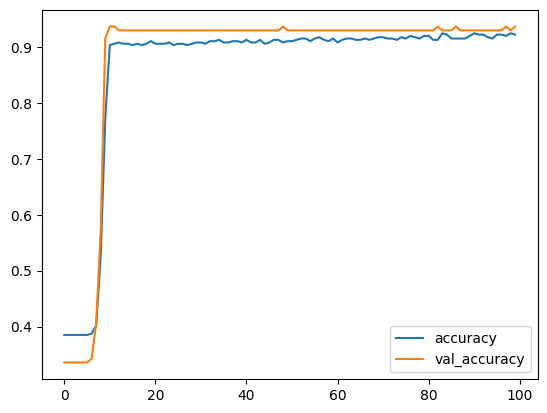

In [ ]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt


data=load_breast_cancer()
x, y = data["data"], data["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y)

x_train_scaled = x_train
x_test_scaled = x_test

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=["accuracy"])

r = model.fit(x_train_scaled, y_train, validation_data=[x_test_scaled, y_test], epochs=100, verbose=0);

print("Train score:",model.evaluate(x_train_scaled, y_train))
print("Train score:",model.evaluate(x_test_scaled, y_test))

plt.plot(r.history["loss"],label='loss')
plt.plot(r.history["val_loss"],label='val_loss')
plt.legend();
plt.show()

plt.plot(r.history["accuracy"],label='accuracy')
plt.plot(r.history["val_accuracy"],label='val_accuracy')
plt.legend();
plt.show()


14/14 [==============================] - 0s 2ms/step - loss: 0.0678 - accuracy: 0.9836
Train score: [0.06775615364313126, 0.9835680723190308]
5/5 [==============================] - 0s 3ms/step - loss: 0.1344 - accuracy: 0.9580
Train score: [0.13437142968177795, 0.9580419659614563]


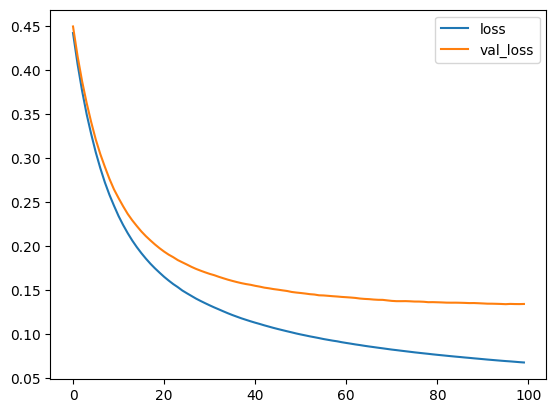

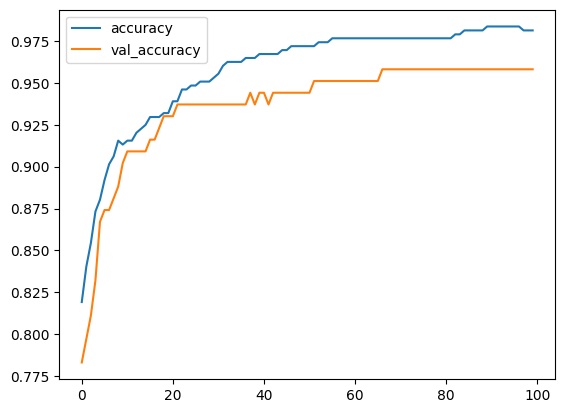

In [ ]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt


data=load_breast_cancer()
x, y = data["data"], data["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y)

scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=["accuracy"])

r = model.fit(x_train_scaled, y_train, validation_data=[x_test_scaled, y_test], epochs=100, verbose=0);

print("Train score:",model.evaluate(x_train_scaled, y_train))
print("Train score:",model.evaluate(x_test_scaled, y_test))

plt.plot(r.history["loss"],label='loss')
plt.plot(r.history["val_loss"],label='val_loss')
plt.legend();
plt.show()

plt.plot(r.history["accuracy"],label='accuracy')
plt.plot(r.history["val_accuracy"],label='val_accuracy')
plt.legend();
plt.show()


# Activation function

Mamy sieć neuronową, ona na wejściu ma wartości takie jak wzrost i waga, wagi modelu to wartości przez jakie mnożymy te wartości zanim przekażemy je do kolejnych neuronów, następnie te wartości sumujemy, **Activation function** jest odpowiedzialne za to co się dalej stanie z tą sumą. Najprostą funkcją aktywacji jest funkcja liniowa czyli suma = - 20 po prześciu przez funkcje nadal jest równa -20 i taka wartość jest przypisywana do neurona, mamy wiele funkcji aktywacyjnych.

![picture](https://drive.google.com/uc?id=1Q0eKNhaekXC8Kw6S4JhQpbrfiOLgyGql)


### Po co nam funkcje aktywacyjne?
Chodzi o to że chcemy manipulować w ten sposób wyjściem neurona, możemy to zrobić definiując jak ważne będą konkretne wyniki w zależności od jego wartości, przykładowo:
- ReLU dla wartości ujemnych zwraca 0 a dla wartości dodatnich tą samą wartość
 *  -30 --> 0 , -130 --> 0 , 30 --> 30 , 123 --> 123
- Sigmoid zwraca wartość z przedziału 0 - 1, przy czym im bardziej wartości są daleko od 0 tym bardziej rzutowane są na 0 (przy wartościach ujemnych) lub 1 (przy wartościach dodatnich)
 *  -30 --> 0.00012 , -130 --> 0.000000032 , 30 --> 0.99988 , 123 --> 0.99999993
- Leaky ReLU dla wartości ujemnej x zwraca 0.1x a dla wartości dodatnich x tą samą wartość x
 *  -30 --> -3 , -130 --> -13 , 30 --> 30 , 123 --> 123

 ReLU jest najczęściej wykorzystywaną funkcją aktywacji która często ma najlepsze efekty.


 ![picture]( https://drive.google.com/uc?id=1riN0h7mY1aV_uf6NOv1DGxhatb8_5aPu)


In [ ]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

def test_activation_function(activation):
  data=load_breast_cancer()
  x, y = data["data"], data["target"]
  x_train, x_test, y_train, y_test = train_test_split(x, y)

  scalar = StandardScaler()
  x_train_scaled = scalar.fit_transform(x_train)
  x_test_scaled = scalar.transform(x_test)

  model = tf.keras.models.Sequential([
      tf.keras.layers.Input(shape=(x_train.shape[1],)),
      tf.keras.layers.Dense(1, activation=activation)
  ])

  model.compile(
          optimizer='adam',
          loss='binary_crossentropy',
          metrics=["accuracy"])

  r = model.fit(x_train_scaled, y_train, validation_data=[x_test_scaled, y_test], epochs=100, verbose=0);

  print("Train score:",model.evaluate(x_train_scaled, y_train))
  print("Train score:",model.evaluate(x_test_scaled, y_test))

  plt.plot(r.history["loss"],label='loss')
  plt.plot(r.history["val_loss"],label='val_loss')
  plt.legend();
  plt.show()

  plt.plot(r.history["accuracy"],label='accuracy')
  plt.plot(r.history["val_accuracy"],label='val_accuracy')
  plt.title(f"Activation function: {activation}")
  plt.legend();
  plt.show()


14/14 [==============================] - 0s 1ms/step - loss: 0.0984 - accuracy: 0.9695
Train score: [0.09844313561916351, 0.9694835543632507]
5/5 [==============================] - 0s 2ms/step - loss: 0.0905 - accuracy: 0.9580
Train score: [0.09052283316850662, 0.9580419659614563]


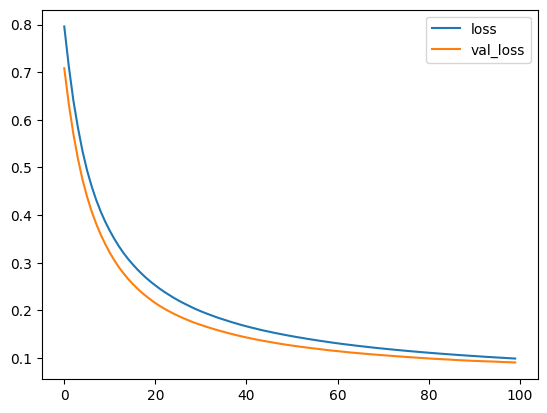

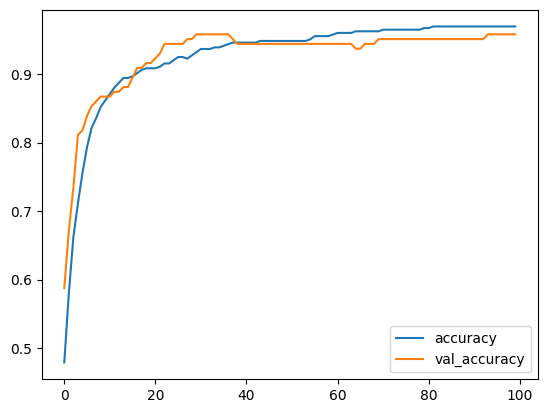

In [ ]:
test_activation_function('sigmoid')

14/14 [==============================] - 0s 2ms/step - loss: 1.6647 - accuracy: 0.8169
Train score: [1.6647052764892578, 0.8169013857841492]
5/5 [==============================] - 0s 2ms/step - loss: 1.0131 - accuracy: 0.8741
Train score: [1.0130674839019775, 0.8741258978843689]


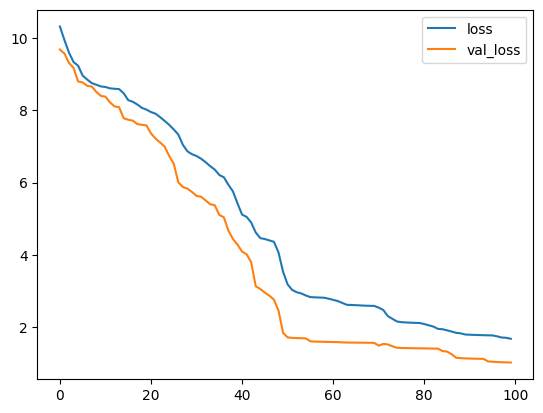

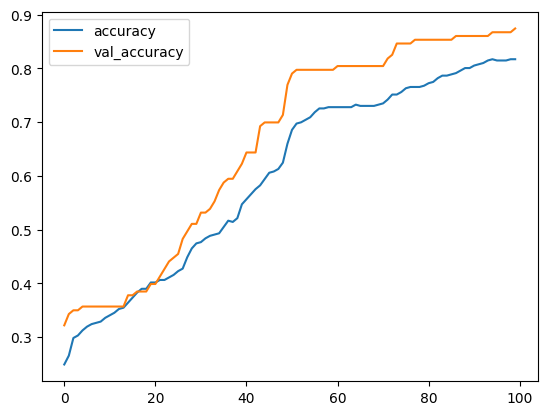

In [ ]:
test_activation_function('relu')

14/14 [==============================] - 0s 5ms/step - loss: 1.1996 - accuracy: 0.8357
Train score: [1.199649453163147, 0.8356807231903076]
5/5 [==============================] - 0s 4ms/step - loss: 0.9422 - accuracy: 0.8182
Train score: [0.9421624541282654, 0.8181818127632141]


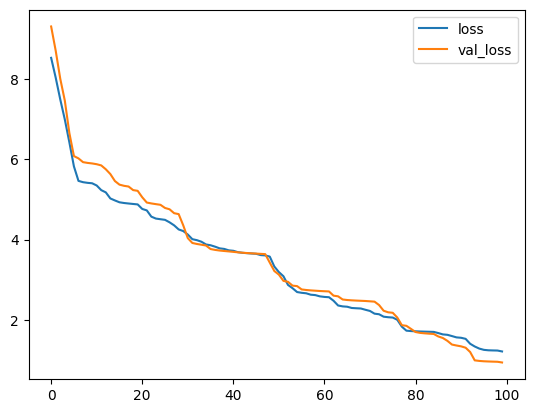

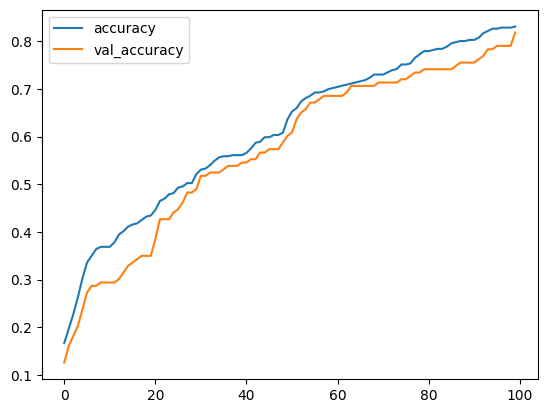

In [ ]:
test_activation_function('tanh')

14/14 [==============================] - 0s 2ms/step - loss: 0.0812 - accuracy: 0.6362
Train score: [0.0811837762594223, 0.6361502408981323]
5/5 [==============================] - 0s 2ms/step - loss: 0.0803 - accuracy: 0.6014
Train score: [0.08029117435216904, 0.6013985872268677]


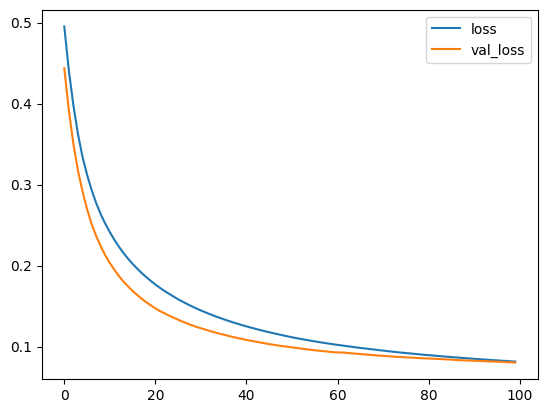

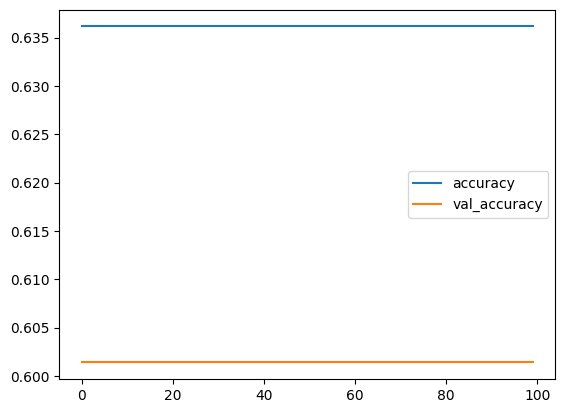

In [ ]:
test_activation_function('softmax')

# Optimizer
Optimizery są funkcjami szukającymi minimum globalnego aby osiągnąć namniejszą wartość funkcji kosztu sieci neuronowej. Po każdym przejściu danych przez sieć, weryfikują czy model zmierza w dobrym kierunku i na podstawie tego aktualizują wagi modelu.
### Gradient descent
Jest ich wiele, najbardziej znanym jest **gradient descent** który jest "ojcem" innych optimizerów. Gradient descent miejsce zerowe znajduje w ten sposób że deklarujemy **learning_rate** które determinuje jak duże skoki będzie wykonywał model. Początek algorytmu polega na tym że zaczynamy poszukiwania w jakimś miejscu na przestrzeni rozwiązań, **gradient** w danym miejscu aby wiedziec jak bardzo nachylony jest wykres w danym miejscu. Im większy jest gradient tym szybciej będziemy poruszali się w stronę w którym funkcja maleje. Możemy to obliczyć poniższym wzorem w którym mnożymy gradient(określający nachylenie funkcji w tanym miejscu) * learning_rate, dzięki temu im bliżej jesteśmy minimum i im mnijesze jest nachylenie funkcji tym mniejsze robimy kroki ponieważ gradient się zmiejsza.


 ![picture]( https://drive.google.com/uc?id=18WHm3Z3ypz4FZe5Sjl638Cy9291zJ4sb)

### Problem gradient descent
Problemem gradient descent jest stały learning rate który może doprowadzać do "przeskakiwania" minimum globalne lub utknięcie w minimum lokalnym. Dzieje się tak kiedy learning rate niewystaczająco wychamowuje wielkości kolenych skoków, lub kiedy kroki są takie małe że nie są wstanie przestkoczyć lokalnego minimum.

 ![picture]( https://drive.google.com/uc?id=1vfFPfNC7ZRgwEbRnrIry0XFERXscY61A)

### ADAM i inne optimizery
Rozwiązaniem tego problemu jest modyfikacja gradient descent. Najczęściej używanym i najbardziej efektywnych jest **Adam**. Adam dodaje mechanizm momentu, który sprawia że optimizer "pamiętając" poprzednie wartości gradientu może określić prędkość z którą poruszamy się po przestrzeni rozwiązań. Dzięki temu:
- przyspieszamy proces uczenia
- jeśli mamy wystarczającą prędkość, możemy uciec z lokalnego minimum jeśli mamy wystarczający moment
- learning_rate jest zmienny dzięki czemu same kroki mogą się zmiejszać




 W zależności od zadania które realizujemy czasem inne modele mogą być lepsze.

 ![picture]( https://drive.google.com/uc?id=1wJWy7TEWZih5fU_wdpBMZ1SOkMaYLKCV)


In [ ]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

def test_optimizer_function(optimizer):
  data=load_breast_cancer()
  x, y = data["data"], data["target"]
  x_train, x_test, y_train, y_test = train_test_split(x, y)

  scalar = StandardScaler()
  x_train_scaled = scalar.fit_transform(x_train)
  x_test_scaled = scalar.transform(x_test)

  model = tf.keras.models.Sequential([
      tf.keras.layers.Input(shape=(x_train.shape[1],)),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(
          optimizer=optimizer,
          loss='binary_crossentropy',
          metrics=["accuracy"])

  r = model.fit(x_train_scaled, y_train, validation_data=[x_test_scaled, y_test], epochs=100, verbose=0);

  print("Train score:",model.evaluate(x_train_scaled, y_train))
  print("Train score:",model.evaluate(x_test_scaled, y_test))

  plt.plot(r.history["loss"],label='loss')
  plt.plot(r.history["val_loss"],label='val_loss')
  plt.legend();
  plt.show()

  plt.plot(r.history["accuracy"],label='accuracy')
  plt.plot(r.history["val_accuracy"],label='val_accuracy')
  plt.title(f"Optimizer function: {optimizer}")
  plt.legend();
  plt.show()


14/14 [==============================] - 0s 2ms/step - loss: 0.1063 - accuracy: 0.9789
Train score: [0.10634039342403412, 0.9788732528686523]
5/5 [==============================] - 0s 2ms/step - loss: 0.1225 - accuracy: 0.9510
Train score: [0.12254463881254196, 0.9510489702224731]


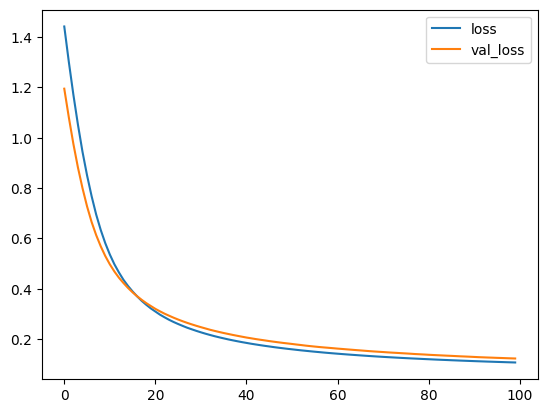

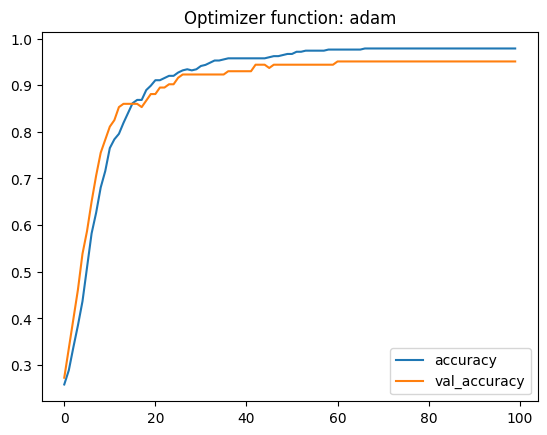

In [ ]:
test_optimizer_function('adam')

14/14 [==============================] - 0s 2ms/step - loss: 0.0987 - accuracy: 0.9695
Train score: [0.09871304780244827, 0.9694835543632507]
5/5 [==============================] - 0s 3ms/step - loss: 0.0982 - accuracy: 0.9650
Train score: [0.09822457283735275, 0.9650349617004395]


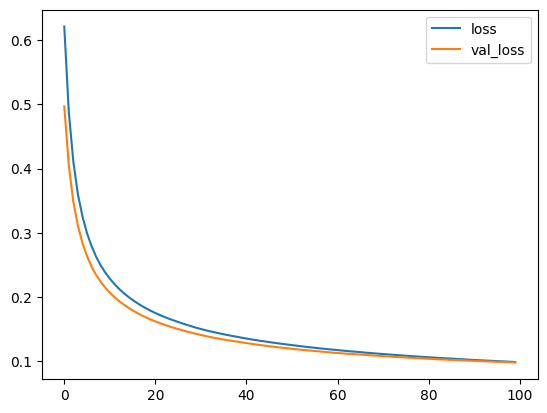

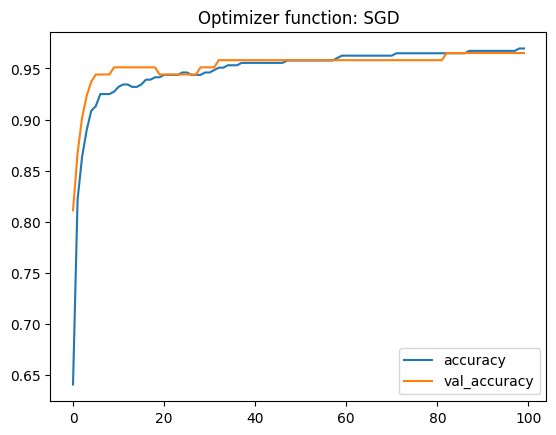

In [ ]:
test_optimizer_function('SGD')

14/14 [==============================] - 0s 3ms/step - loss: 0.0736 - accuracy: 0.9812
Train score: [0.07361728698015213, 0.9812206625938416]
5/5 [==============================] - 0s 4ms/step - loss: 0.0534 - accuracy: 0.9860
Train score: [0.05340711772441864, 0.9860140085220337]


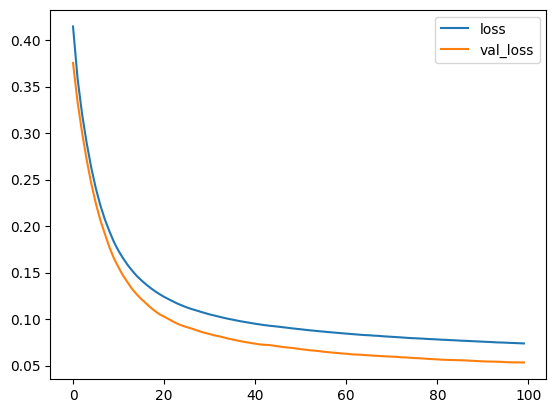

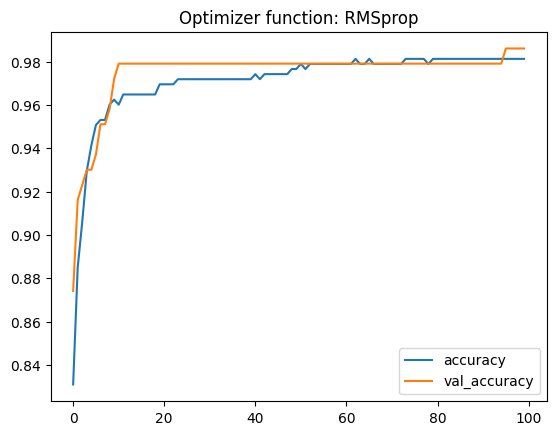

In [ ]:
test_optimizer_function('RMSprop')

# Jak działa sieć neuronowa?
Na podstawie filmu "Ale czym są sieci neuronowe? | Deep learning, część 1" https://www.youtube.com/watch?v=aircAruvnKk

Załóżmy że nasza sieć ma przewidywać jaki numer jest napisany na obrazie 28x28. Pierwsza warstwa składa się z 784 neuronów, do każdego z neuronów trafia dokładnie jeden piksel, na ostatniej warstwie jest tyle neuronów ile jest możliwych wyników detekcji,
warstwy w środku - **hidden layers** - określa cechy charakterystyczne i cechy szczególne pomagające w detekcji.

![picture]( https://drive.google.com/uc?id=11TtcehTxmCx5LrUDeM_lPiA-8TrU69Oe)

W każdej komurce dochodzi do następujących operacji podczas predykcji wyniku. Przykładowo pierwszy neuron w drugiej warstwie:
- otrzymuje wartości a_n (n od 1 do 784) które odpowiadają wartością neuronów w poprzedniej warstwie
- każda z tych wartości jest mnożona przez odpowiadającą jej wagę która znajduję się na łączeniu obu neuronów
- na końcu uwzględniamy wartość bias, która zależy od tego w którym momencie chcemy brać wartość neurona pod uwagę
- całość powyższych elementów wstawiamy fako argument funkcji aktywacji
- powtarzamy to dla każdej komórki w sieci neuronowej
- ostatecznie dojdziemy do warstwy końcowej gdzie otrzymamy wynik naszej sieci w postaci neurona który jest najbardziej aktywny

![picture]( https://drive.google.com/uc?id=1hJyFLldifD3ARc2Xn0z2YfAfsmxpkdUL)

Możemy to również przedstawić w następujący sposób na macierzy, jest to lepszy matematyczne zapis.
![picture]( https://drive.google.com/uc?id=1htO9SUApbFihagB6nynXkj_29RKFVqyo)

# Jak uczyć sieć neuronową?
Gradient descent, how neural networks learn | Chapter 2, Deep learning

https://www.youtube.com/watch?v=IHZwWFHWa-w&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=2